## Business Analytics- Capstone #3 Crawling Assignment

### 201721499 장예슬

#### 이번과제는 강의내용을 바탕으로 '텍스트마이닝을 이용한 감성분류분석' 을 진행했습니다.

- 강의자료에 있던 한국어 텍스트 데이터 전처리 패키지인 konlpy에 대해 조금 더 학습해보고 싶어서 관련 데이터로 진행하게 되었습니다.

- 출처: https://hyemin-kim.github.io/2020/08/29/E-Python-TextMining-2/

## 1. Library 와 Data import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/tripadviser_review.csv")
#Tripadvisor 여행 사이트에서 ' 제주호텔'로 검색해서 나온 리뷰들을 활용
df.head()

,rating,text
0,4,여행에 집중할수 있게 편안한 휴식을 제공하는 호텔이었습니다. 위치선정 또한 적당한 ...
1,4,"2일 이상 연박시 침대, 이불, 베게등 침구류 교체 및 어메니티 보강이 필요해 보입..."
2,4,지인에소개로온 호텔 깨끗하고 좋은거같아요 처음에는 없는게 많아 많이 당황했는데 ...
3,5,방에 딱 들어서자마자 눈이 휘둥그레질정도로 이렇게 넓은 호텔 처음 와본 것 같아요!...
4,5,저녁에 맥주한잔 하는게 좋아서 렌트 안하고 뚜벅이 하기로 했는데 호텔 바로 앞에 버...


## 2. 데이터셋 살펴보기

In [4]:
#구분
df.shape

(1001, 2)

In [5]:
#결측치
df.isnull().sum()

rating    0
text      0
dtype: int64

In [6]:
# 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 2 columns):
rating    1001 non-null int64
text      1001 non-null object
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


## 3. 한국어 텍스트 데이터 전처리

- 텍스트 데이터로 되어있는 리뷰 데이터를 이해하기 위해서 `단어`단위로 분리하는 전처리 작업이 필요하다.
- 리뷰이 평가 내용을 단어화해서 형태소를 추출하고, Bag of Words를 생성하여 TF-IDF변환을 진행

### 3.1 Knolpy 설치

In [7]:
!pip install konlpy==0.5.2 jpype1 Jpype1-py3

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 21.2.4 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


### 3.2 정규 표현식 적용

In [8]:
# 정규 표현식 함수 정의

import re

def apply_regular_expression(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 한글 추출 규칙: 띄어 쓰기(1 개)를 포함한 한글
    result = hangul.sub('', text)  # 위에 설정한 "hangul"규칙을 "text"에 적용(.sub)시킴
    return result

df['text'][0] #결과 확인

'여행에 집중할수 있게 편안한 휴식을 제공하는 호텔이었습니다. 위치선정 또한 적당한 편이었고 청소나 청결상태도 좋았습니다.'

In [9]:
apply_regular_expression(df['text'][0])
# 정규표현식을 적용한 후 특수문자가 제거된 것을 확인

'여행에 집중할수 있게 편안한 휴식을 제공하는 호텔이었습니다 위치선정 또한 적당한 편이었고 청소나 청결상태도 좋았습니다'

### 3.3 한국어 형태소 분석 - 명사 단위

In [10]:
from konlpy.tag import Okt
from collections import Counter

- 명사 형태소 추출함수 `okt()`를 이용하여 정규 표현식을 적용한 텍스트 첫 행 내용의 형태소를 추출

In [11]:

okt = Okt()  # 명사 형태소 추출 함수
nouns = okt.nouns(apply_regular_expression(df['text'][0]))
nouns

['여행', '집중', '휴식', '제공', '호텔', '위치', '선정', '또한', '청소', '청결', '상태']

- 전체 말뭉치(corpus)에 적용해서 명사 형태소를 추출하기

In [13]:
# 말뭉치 생성
corpus = "".join(df['text'].tolist())
#corpus

#너무 길어서 주석처리 했습니다.

In [14]:
# 전체 말뭉치(corpus)에서 명사 형태소 추출
nouns = okt.nouns(apply_regular_expression(corpus))
#print(nouns)

#너무 길어서 주석처리 했습니다.

- 빈도 탐색

In [16]:
counter = Counter(nouns)
counter.most_common(10)

[('호텔', 803),
 ('수', 498),
 ('것', 436),
 ('방', 330),
 ('위치', 328),
 ('우리', 327),
 ('곳', 320),
 ('공항', 307),
 ('직원', 267),
 ('매우', 264)]

- 한글자 명사 제거

수’, ‘것’, '곳’과 같은 한 글자 키워드는 분석에 딱히 좋은 영향을 미치지 않은 것으로 보임.  한글자 명사를 제거하자


In [18]:
available_counter = Counter({x: counter[x] for x in counter if len(x) > 1})
available_counter.most_common(10)

[('호텔', 803),
 ('위치', 328),
 ('우리', 327),
 ('공항', 307),
 ('직원', 267),
 ('매우', 264),
 ('가격', 245),
 ('객실', 244),
 ('시설', 215),
 ('제주', 192)]

- RANK NL에 제공해주는 한국어 불용어 사전을 활용해보기

In [19]:
stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()
stopwords[:10]

[['휴'],
 ['아이구'],
 ['아이쿠'],
 ['아이고'],
 ['어'],
 ['나'],
 ['우리'],
 ['저희'],
 ['따라'],
 ['의해']]

- 특히 자주 반복되는 용어들 중 분석하고자 할 때 필요 없는 단어("제주","호텔","숙소")들을 불용어 사전에 추가한다 

In [20]:
jeju_hotel_stopwords = ['제주', '제주도', '호텔', '리뷰', '숙소', '여행', '트립']
for word in jeju_hotel_stopwords:
    stopwords.append(word)


### Word Count

In [22]:
# 벡터 생성
from sklearn.feature_extraction.text import CountVectorizer

def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 정규 표현식 처리
    result = hangul.sub('', text)
    okt = Okt()  # 형태소 추출
    nouns = okt.nouns(result)
    nouns = [x for x in nouns if len(x) > 1]  # 한글자 키워드 제거
    nouns = [x for x in nouns if x not in stopwords]  # 불용어 제거
    return nouns

vect = CountVectorizer(tokenizer = lambda x: text_cleaning(x))
bow_vect = vect.fit_transform(df['text'].tolist())
word_list = vect.get_feature_names()
count_list = bow_vect.toarray().sum(axis=0)


- 각 단어가 전체 리뷰에 등장한 총 횟수 구하기

In [23]:
count_list

array([  4,   8, 245, ...,   1,   7,  14], dtype=int64)

- "단어" - "총 등장 횟수" Matching

In [24]:

word_count_dict = dict(zip(word_list, count_list))
word_count_dict

{'가가': 4,
 '가게': 8,
 '가격': 245,
 '가격표': 1,
 '가구': 8,
 '가급': 1,
 '가기': 20,
 '가까이': 20,
 '가끔': 5,
 '가능': 10,
 '가도': 7,
 '가동': 2,
 '가두': 1,
 '가득': 2,
 '가든': 1,
 '가라': 3,
 '가량': 1,
 '가려움': 1,
 '가로': 2,
 '가면': 14,
 '가몬': 1,
 '가무': 1,
 '가물': 1,
 '가미': 1,
 '가방': 4,
 '가버': 1,
 '가성': 49,
 '가세': 3,
 '가스레인지': 1,
 '가스렌지': 1,
 '가슴': 1,
 '가시': 4,
 '가신': 3,
 '가야': 10,
 '가옥': 1,
 '가요': 5,
 '가용': 1,
 '가운데': 3,
 '가을': 4,
 '가인': 1,
 '가장': 42,
 '가정': 4,
 '가정식': 2,
 '가족': 94,
 '가지': 55,
 '가짓수': 3,
 '가차': 1,
 '가치': 15,
 '가품': 1,
 '각각': 7,
 '각오': 1,
 '각자': 2,
 '각종': 3,
 '각층': 1,
 '간격': 2,
 '간곳': 1,
 '간다': 4,
 '간단': 1,
 '간만': 1,
 '간식': 5,
 '간이': 3,
 '간주': 1,
 '간직': 1,
 '간판': 2,
 '간혹': 1,
 '갈껄': 1,
 '갈비': 1,
 '갈비탕': 1,
 '갈수': 7,
 '갈수록': 1,
 '감각': 1,
 '감동': 12,
 '감명': 1,
 '감사': 6,
 '감상': 3,
 '감소': 1,
 '감안': 5,
 '감자': 1,
 '감히': 1,
 '갑인': 1,
 '갑자기': 4,
 '갑작스레': 1,
 '강남': 1,
 '강력': 9,
 '강아지': 7,
 '강압': 2,
 '강제': 1,
 '강조': 1,
 '강추': 8,
 '개념': 1,
 '개략': 1,
 '개미': 1,
 '개발': 3,
 '개방': 2,
 '개별': 3,
 '개보': 1,
 '개뿔': 1,


### 3.6 TF-IDF 적용

- Bag of Word 벡터에 대해서 TF-IDF 변환 진행

In [25]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect)

In [26]:
print(tf_idf_vect.shape)
# 리뷰X단어

(1001, 3599)


In [27]:
# 첫 번째 리뷰에서의 단어 중요도(TF-IDF 값) -- 0이 아닌 것만 출력
print(tf_idf_vect[0])

  (0, 3588)	0.35673213299026796
  (0, 2927)	0.2582351368959594
  (0, 2925)	0.320251680858207
  (0, 2866)	0.48843555212083145
  (0, 2696)	0.23004450213863206
  (0, 2311)	0.15421663035331626
  (0, 1584)	0.48843555212083145
  (0, 1527)	0.2928089229786031
  (0, 790)	0.2528176728459411


### 4. 감성 분류 - Logistic Regression

- 감성 분류 예측 모델이란, 이용자 리뷰의 평가 내용을 통해 이 리뷰가 긍정적인지, 부정적인지를 예측하여, 이용자의 감성을 파악

- 따라서, 모델의 X 값(즉, feature 값)은 이용자 리뷰의 평가 내용, 모델의 Y 값(즉, label 값)은 이용자의 긍/부정 감성.



- 우리는 이용자의 리뷰를 “긍정” / “부정” 두가지 부류로 나눔. 
- 하지만 이러한 이용자의 감성을 대표할 수 있는 “평가 점수” 변수는 1 ~ 5의 value를 가지고 있다. 따라서 "평가 점수"변수 (rating: 1 ~ 5)를 이진 변수 (긍정: 1, 부정:0)으로 변환해야 함

In [29]:
df.sample(10)

# 4~5점의 리뷰는 대부분 긍정적이었지만, 1~3점의 리뷰는 부정적인 평가가 많음

,rating,text
876,3,숙소 앞 바다의 풍경이 너무 좋고 한산하고 조용하여 연인이나 나혼자 여행에도 적합할...
945,4,"Просторный номер,нормальных размеров санузел с..."
108,3,"제주도 혼자 여행중에 마지막 날에 들렸는데, 접근성에서는 좋았는데, 과거 경험한 ..."
69,5,일단 시설이 굉장히 깨끗하구 직원분들 모두가 다 친절하세요^^ 조식도 저렴한데 퀄리...
531,4,근처에 살고 있기 때문에 이 호텔을 선택하는 매우 중요한 요인이 있는 해변으로 수영...
731,1,1. 실내 환기팬 및 에어컨 소음 - 침대와 객실 외부 유리창 사이에 스파가 있는...
427,3,지은지얼마안돼어깔끔합니다. 옥상에올라가면 제주공항도보이고 시내가 한눈에들어와요. 화...
251,5,제주에서 묵었던 숙소 중에 가장 깨끗하고 좋았어요. 규모는 작지만 곰팡이 하나 없이...
286,4,더블 침대가있는 객실을 예약했으며 객실이 매우 넓고 침대 / 옷장 공간과 침실 사이...
857,5,밤 늦게 도착했는데도 환하게 웃으면서 맞아주시고 짐도 옮겨주셨습니다. 바로 앞에 바...


- 4~5점은 "긍정적"으로 분류하여 1을 부여, 1~3은 "부정적"으로 분류하여 0을 부여

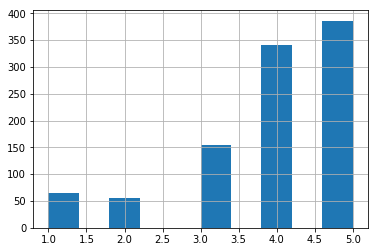

In [30]:
df['rating'].hist()

In [32]:
def rating_to_label(rating):
    if rating > 3:
        return 1
    else:
        return 0
    
df['y'] = df['rating'].apply(lambda x: rating_to_label(x))


In [33]:
df.head()

,rating,text,y
0,4,여행에 집중할수 있게 편안한 휴식을 제공하는 호텔이었습니다. 위치선정 또한 적당한 ...,1
1,4,"2일 이상 연박시 침대, 이불, 베게등 침구류 교체 및 어메니티 보강이 필요해 보입...",1
2,4,지인에소개로온 호텔 깨끗하고 좋은거같아요 처음에는 없는게 많아 많이 당황했는데 ...,1
3,5,방에 딱 들어서자마자 눈이 휘둥그레질정도로 이렇게 넓은 호텔 처음 와본 것 같아요!...,1
4,5,저녁에 맥주한잔 하는게 좋아서 렌트 안하고 뚜벅이 하기로 했는데 호텔 바로 앞에 버...,1


In [34]:
df["y"].value_counts()

1    726
0    275
Name: y, dtype: int64

####  Training set / Test set 나누기


In [52]:
from sklearn.model_selection import train_test_split

x = tf_idf_vect
y = df['y']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)

x_train.shape, y_train.shape

#1:1 샘플링
positive_random_idx = df[df['y']==1].sample(275, random_state=12).index.tolist()
negative_random_idx = df[df['y']==0].sample(275, random_state=12).index.tolist()

random_idx = positive_random_idx + negative_random_idx
x = tf_idf_vect[random_idx]
y = df['y'][random_idx]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

x_train.shape, y_train.shape

((412, 3599), (412,))

In [53]:
x_test.shape, y_test.shape

((138, 3599), (138,))

### 모델 학습

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# fit in training set
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

# predict in test set
y_pred = lr.predict(x_test)

lr2 = LogisticRegression(random_state = 0)
lr2.fit(x_train, y_train)
y_pred = lr2.predict(x_test)


In [55]:
# classification result for test set

print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))


accuracy: 0.72
precision: 0.70
recall: 0.74
F1: 0.72


In [56]:
# classification result for test set

print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))


accuracy: 0.72
precision: 0.70
recall: 0.74
F1: 0.72


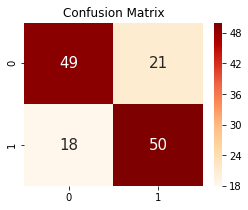

In [57]:
# confusion matrix

from sklearn.metrics import confusion_matrix

confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

### 5.긍정/부정 키워드 분석

- 추출된 키워드를 통해 장,단점을 파악할 수 있고 이를 기반으로 앞으로 유지해야할 서비스와 개선이 필요한 서비스에 대해서도 파악 가능

In [58]:
print(sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)[:5])
print(sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)[-5:])
# enumerate: 인덱스 번호와 컬렉션의 원소를 tuple형태로 반환함

[(1.2644550507381787, 1217), (0.9079356150239053, 2400), (0.895609472071521, 1148), (0.8859075267474583, 2730), (0.8795111499693716, 43)]
[(-0.7201222787741572, 1310), (-0.7519681298547074, 3022), (-0.8672956005075485, 567), (-0.9190158099937462, 515), (-0.9945592515966041, 2143)]


In [65]:
coef_pos_index = sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)
coef_neg_index = sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = False)

- index를 단어로 변환하여 "긍정"키워드 리스트와 "부정"키워드 리스트의 top20단어를 출력

In [59]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
invert_index_vectorizer

{2866: '집중',
 3588: '휴식',
 2696: '제공',
 2311: '위치',
 1584: '선정',
 790: '또한',
 2927: '청소',
 2925: '청결',
 1527: '상태',
 2392: '이상',
 3022: '침대',
 2388: '이불',
 3021: '침구',
 299: '교체',
 2013: '어메니티',
 1296: '보강',
 1277: '베스트',
 2299: '웨스턴',
 3564: '회원',
 185: '경우',
 106: '객실',
 3009: '층수',
 2234: '요청',
 2606: '적극',
 1188: '반영',
 2837: '지인',
 1629: '소개',
 2910: '처음',
 611: '당황',
 1607: '세면',
 675: '도구',
 2555: '잠옷',
 3358: '필수',
 361: '그것',
 2673: '정도',
 578: '다음',
 2074: '여기',
 1171: '박만',
 2595: '저녁',
 981: '맥주',
 3414: '한잔',
 838: '렌트',
 791: '뚜벅',
 1159: '바로',
 1247: '버스',
 2676: '정류',
 697: '도착',
 24: '가방',
 2487: '일찍',
 2685: '정비',
 1225: '방이',
 2500: '입실',
 2038: '업그레이드',
 2849: '직원',
 2680: '정말',
 1148: '바다',
 2623: '전망',
 2636: '전일',
 3425: '함덕',
 624: '대명',
 3091: '콘도',
 1861: '실내',
 1384: '분위기',
 1659: '손님',
 40: '가장',
 1241: '배치',
 651: '대해',
 634: '대응',
 1889: '써비스',
 2730: '조식',
 1351: '부분',
 1838: '신경',
 1922: '아주',
 3208: '특급',
 3191: '트랜디',
 210: '고민',
 3593: '흔적',
 2082: '여

In [66]:
for coef in coef_pos_index[:20]:
    print(invert_index_vectorizer[coef[1]], coef[0])


방문 1.2644550507381787
이용 0.9079356150239053
바다 0.895609472071521
조식 0.8859075267474583
가족 0.8795111499693716
가성 0.8541915649753757
다음 0.8362541212560809
최고 0.7714811231976703
사장 0.7375280889735719
맛집 0.7203390936359615
추천 0.6503260268852225
거리 0.6488836121942877
마음 0.6467914172687944
바로 0.6264469987695738
리조트 0.5943145305412955
출장 0.5505354129422678
도움 0.5294632094678557
인테리어 0.5240729254152497
아주 0.5207834696883535
의사 0.5153917648445299


In [67]:
for coef in coef_neg_index[:20]:
    print(invert_index_vectorizer[coef[1]], coef[0])

예약 -0.9945592515966041
냄새 -0.9190158099937462
다른 -0.8672956005075485
침대 -0.7519681298547074
보이 -0.7201222787741572
최악 -0.7142499739127354
에어컨 -0.6786616478611768
별로 -0.6742178511586063
찾기 -0.6584721911054098
취소 -0.6464141509409321
사람 -0.6451323735594592
정도 -0.6240099604615805
사진 -0.6089303470147718
대부분 -0.5889712626646347
다시 -0.5601302753897155
대해 -0.5518124209379022
노후 -0.5484791097700695
느낌 -0.5423970967095598
필요 -0.5413974621071783
문제 -0.5287746123667489


#### 결과적으로 이용객들은 보통  제주 호텔의 바다뷰 혹은 바다 접근성, 주변 맛집 그리고 인테리어 등에 만족함

#### 하지만 숙소의 냄새 그리고 침대, 에어컨 등 시설의 상태가 많이 아쉽고 개선이 필요함